Nom 1: Eic Escrich

Nom 2: Adrià Vilariño

# Repte 1: Fashion

## Enunciat
Descarrega el dataset **fashion_mnist** de la secció de datasets de la llibreria TensorFlow i crea una xarxa neuronal capaç d'identificar les diferents peces de roba. Els valors de les etiquetes de sortida corresponen a les següents classes:

>0: T-shirt/top<br>
>1: Trouser<br>
>2: Pullover<br>
>3: Dress<br>
>4: Coat<br>
>5: Sandal<br>
>6: Shirt<br>
>7: Sneaker<br>
>8: Bag<br>
>9: Ankle boot<br>



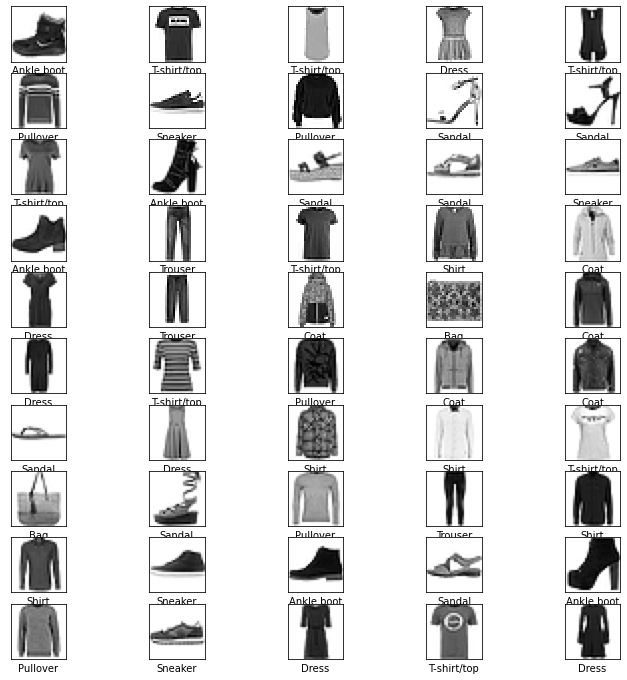

In [2]:
# Importem llibreries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Descarreguem el dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [3]:
# Creem una llista amb els noms de les peces de roba
roba_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]
# Normalitzem dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Comprovem la forma de les dades
print(x_train.shape)
print(y_train.shape)
print(x_train.dtype)
print(y_train.dtype)

(60000, 28, 28)
(60000,)
float32
uint8


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

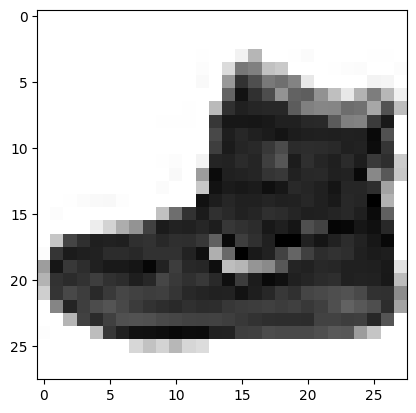

[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.16078432 0.7372549
  0.40392157 0.21176471 0.1882353  0.16862746 0.34117648 0.65882355
  0.52156866 0.0627451  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.         0.19215687 0.53333336 0.85882354 0.84705883 0.89411765
  0.9254902  1.         1.         1.         1.         0.8509804
  0.84313726 0.99607843 0.90588236 0.627451   0.1764706  0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.05490196
  0.6901961  0.87058824 0.8784314  0.83137256 0.79607844 0.7764706
  0.76862746 0.78431374 0.84313726 0.8        0.7921569  0.7882353
  0.7882353  0.7882353  0.81960785 0.85490197 0.8784314  0.6431373
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.7372549
  0.8

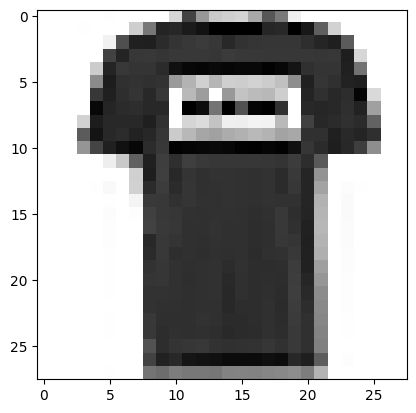

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.08627451 0.4627451  0.09411765
  0.         0.         0.         0.         0.         0.1882353
  0.34509805 0.01960784 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.04705882 0.39215687 0.83137256 0.8039216
  0.7254902  0.7019608  0.6784314  0.7294118  0.75686276 0.8666667
  0.5568628  0.33333334 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.33333334 0.29803923 0.78039217
  0.88235295 0.972549   1.         0.93333334 0.8862745  0.6156863
  0.26666668 0.3137255  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         

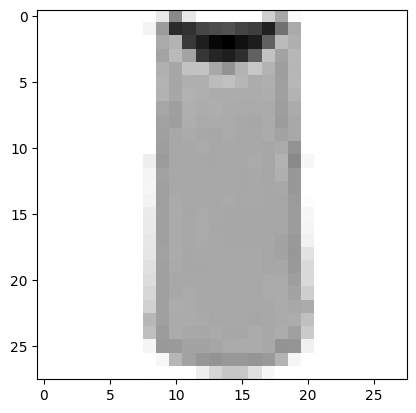

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.12941177 0.3764706  0.6862745  0.6117647
  0.2509804  0.05490196 0.21176471 0.5372549  0.8        0.7607843
  0.4        0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.28627452 0.7294118  0.69411767 0.7176471  0.6862745  0.7372549
  0.9098039  1.         0.8745098  0.85882354 0.7607843  0.7019608
  0.7294118  0.8352941  0.57254905 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.13725491
  0.6392157  0.54901963 0.5882353  0.59607846 0.5882353  0.57254905
  0.6862745  0.6862745  0.6784314  0.67058825 0.6117647  0.59607846
  0.5803922  0.5058824  0.6117647  0.54901963 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.5882353
  0.5568628  0.54901

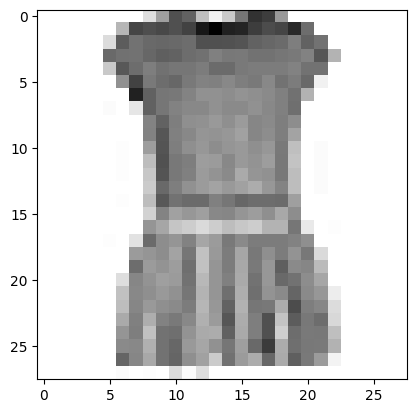

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.10196079
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.7411765  0.80784315 0.73333335 0.1254902
  0.         0.         0.         0.10196079 0.8509804  0.8862745
  0.76862746 0.04313726 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.7529412  0.8901961  0.91764706 0.9529412
  0.9019608  0.5764706  0.9372549  0.9490196  0.91764706 0.85490197
  0.81960785 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.6784314  0.88235

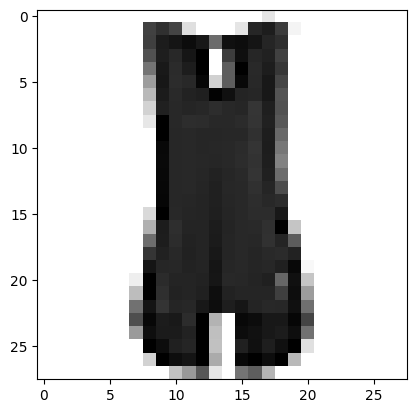

In [4]:
# Visualitzem les primeres 50 imatges
for i in range(50):
  print(f'{x_train[i]}')
  print(y_train[i])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.show()

In [5]:
# Definim el model de xarxa neuronal
# Si fem servir la capa keras.layers.Flatten() ens podem estalviar fer reshape
# de les dades d'entrada
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Mostrem el resum del model creat
model.summary()


c:\Users\Eric Escrich\Desktop\Clase\M3_Aritz_programacioIA\programacio_IA\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:

# Configurem l'entrenament del nostre model de xarxa neuronal
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Iniciem l'entrenament
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.9444 - loss: 0.1482
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.9488 - loss: 0.1396
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step - accuracy: 0.9520 - loss: 0.1308
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.9518 - loss: 0.1308
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.9513 - loss: 0.1348
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.9527 - loss: 0.1302
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.9529 - loss: 0.1304
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.9535 - loss: 0.1256
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step - accuracy: 0.9532 - loss: 0.1276
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.9539 - loss: 0.1260
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.9544 - loss: 0.1234
Epoch 12

In [22]:
# Evaluem el model amb el conjunt de dades de test
test_lost, test_accuracy = model.evaluate(x_test, y_test)
print('Precisió de test:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.8953 - loss: 0.3698
Precisió de test: 0.8964999914169312


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
prediccio: Trouser
resposta correcte Trouser


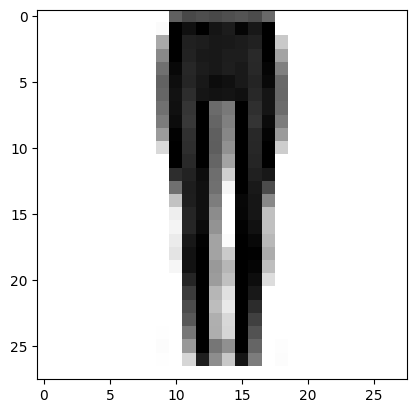

In [19]:
# Mostra la predicció que realitza la Xarxa neuronal de la imatge de test 777,
# la resposta correcta i la imatge corresponent
predictio = model.predict(x_test[777:778])


print('prediccio:', roba_labels[np.argmax(predictio)])
print('resposta correcte', roba_labels[np.argmax(y_test[777])])


plt.imshow(x_test[777].reshape(28, 28), cmap=plt.cm.binary)
plt.show()


## Part opcional 1

In [23]:
# Canvia l'optimitzador del model per tal d'obtenir una xarxa neuronal que
# millori l'encert del model anterior. Pots consultar-los a https://keras.io/api/optimizers/

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=32)
test_lost, test_accuracy = model.evaluate(x_test, y_test)
print('Precisió de test:', test_accuracy)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 830us/step - accuracy: 0.9400 - loss: 0.1611
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - accuracy: 0.9395 - loss: 0.1587
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - accuracy: 0.9418 - loss: 0.1548
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 823us/step - accuracy: 0.9428 - loss: 0.1533
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.9416 - loss: 0.1521
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.9432 - loss: 0.1499
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.9466 - loss: 0.1421
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - accuracy: 0.9466 - loss: 0.1429
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 804us/step - accuracy: 0.9476 - loss: 0.1400
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 806us/step - accuracy: 0.9488 - loss: 0.1375
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - accuracy: 0.9517 - loss: 0.1299
Epoch 12

## Part opcional 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


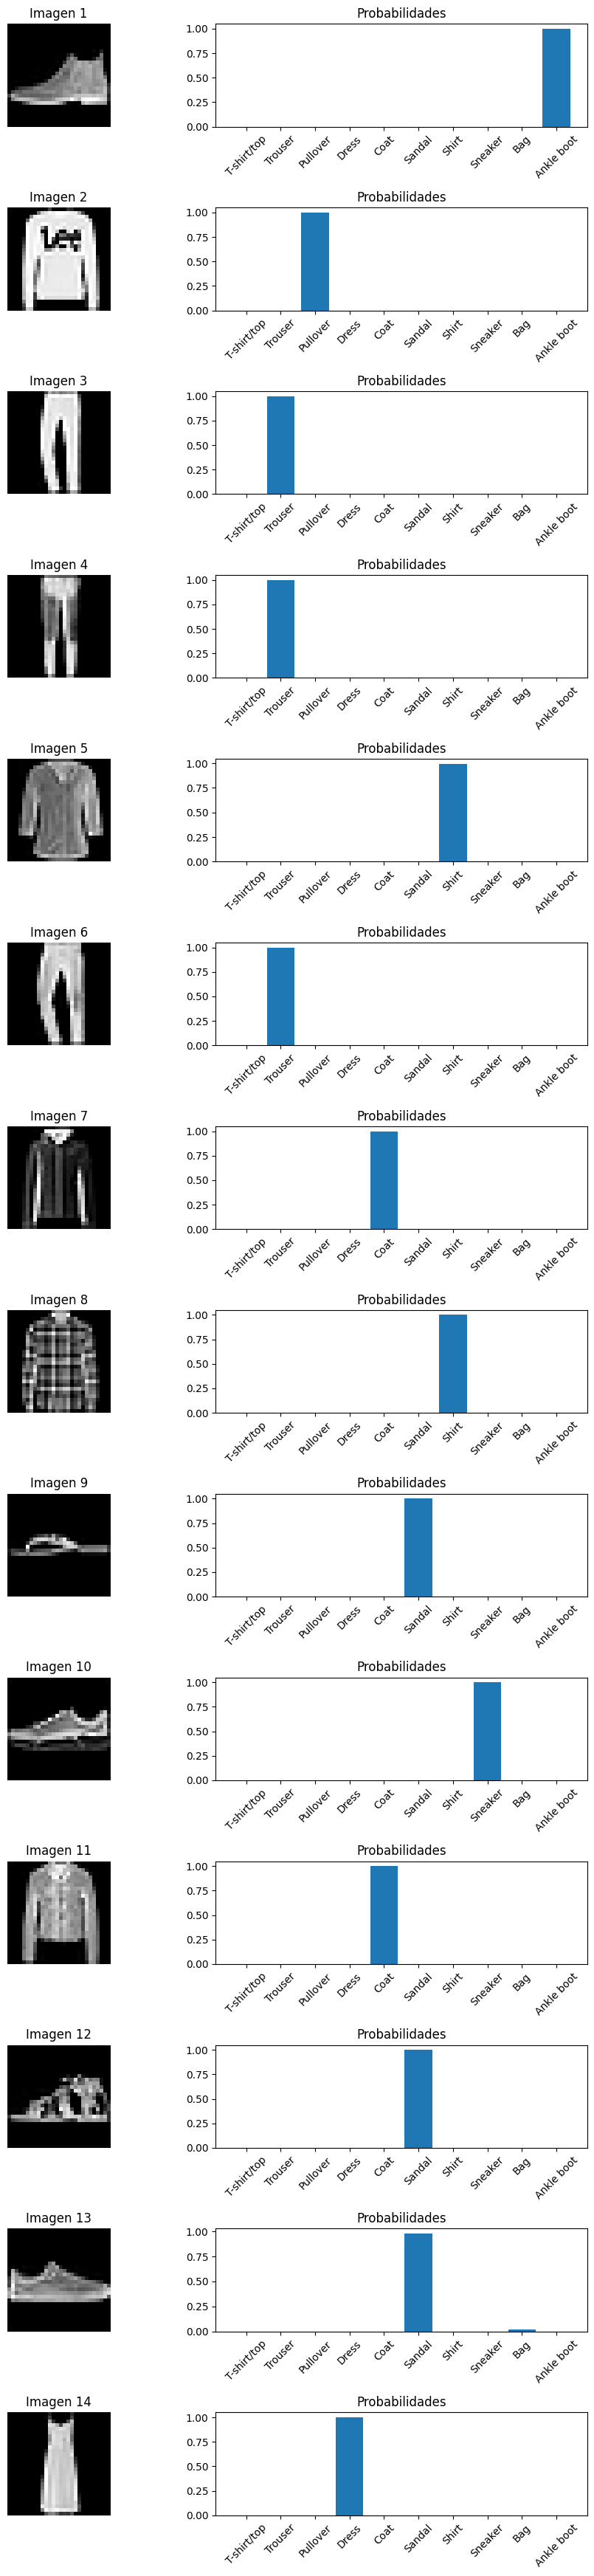

In [24]:
# Mostra les 14 primeres imatges de test, cada una amb un histograma al costat
# on es visualitzi la probabilitat de pertànyer a cada una de les classes

# Realizar predicciones sobre las primeras 14 imágenes de prueba
predictions = model.predict(x_test[:14])

# Crear una figura para mostrar las imágenes y los histogramas
fig, axes = plt.subplots(14, 2, figsize=(10, 35))

for i in range(14):
    # Mostrar la imagen
    axes[i, 0].imshow(x_test[i], cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f'Imagen {i+1}')

    # Mostrar el histograma de probabilidades
    axes[i, 1].bar(range(10), predictions[i])
    axes[i, 1].set_xticks(range(10))
    axes[i, 1].set_xticklabels(roba_labels, rotation=45)
    axes[i, 1].set_title('Probabilidades')

plt.tight_layout()
plt.show()